In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define symbols
P0, P, L, PL, L0, Kd = sp.symbols('P0 P L PL L0 Kd')

# Define the equations
eq1 = sp.Eq(P0, P + PL)
eq2 = sp.Eq(L0, L + PL)
eq3 = sp.Eq(Kd, P * L / PL)
pb_expr = L / (L + Kd)

# Solve the equations for P, L, PL
solutions = sp.solve((eq1, eq2, eq3), (P, L, PL))
L_sol = solutions[1][1]  # Extract the solution for L

#L_sol

solutions[1][1]

-Kd/2 + L0/2 - P0/2 + sqrt(Kd**2 + 2*Kd*L0 + 2*Kd*P0 + L0**2 - 2*L0*P0 + P0**2)/2

In [3]:
# Create a symbolic expression for p_b
pb_expr_substituted = pb_expr.subs(L, L_sol)

pb_expr_substituted


(-Kd/2 + L0/2 - P0/2 + sqrt(Kd**2 + 2*Kd*L0 + 2*Kd*P0 + L0**2 - 2*L0*P0 + P0**2)/2)/(Kd/2 + L0/2 - P0/2 + sqrt(Kd**2 + 2*Kd*L0 + 2*Kd*P0 + L0**2 - 2*L0*P0 + P0**2)/2)

0.9353604251653833 0.9627155221697407


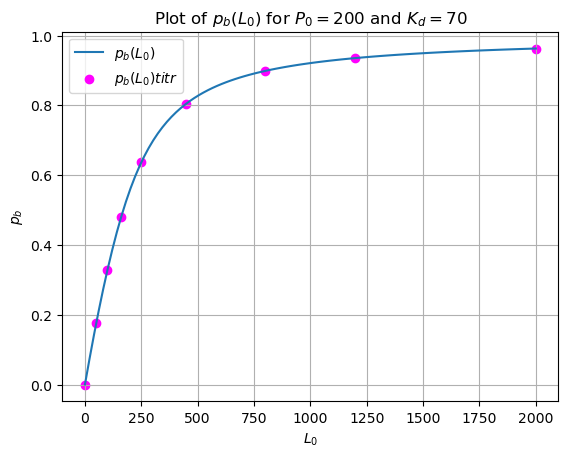

In [30]:
# Use lambdify to create a numerical function
pb_func = sp.lambdify((L0, P0, Kd), pb_expr_substituted, 'numpy')

# Generate data for the plot
L0_values = np.linspace(0, 2000, 100)
P0_val = 200
Kd_val = 70
pb_values = pb_func(L0_values, P0_val, Kd_val)

#L0_titr = np.linspace(0, 1000, 20)
L0_titr =np.array([0,50,100,160,250,450,800,1200,2000])
pb_titr_values = pb_func(L0_titr, P0_val, Kd_val)

print(pb_func(L0_titr[-2], P0_val, Kd_val),pb_func(L0_titr[-1], P0_val, Kd_val))

# Plot using matplotlib
plt.plot(L0_values, pb_values, label=r'$p_b(L_0)$')
plt.scatter(L0_titr, pb_titr_values, label=r'$p_b(L_0) titr$',color='magenta')
plt.xlabel(r'$L_0$')
plt.ylabel(r'$p_b$')
plt.title(r'Plot of $p_b(L_0)$ for $P_0=200$ and $K_d=70$')
plt.legend()
plt.grid(True)
plt.show()